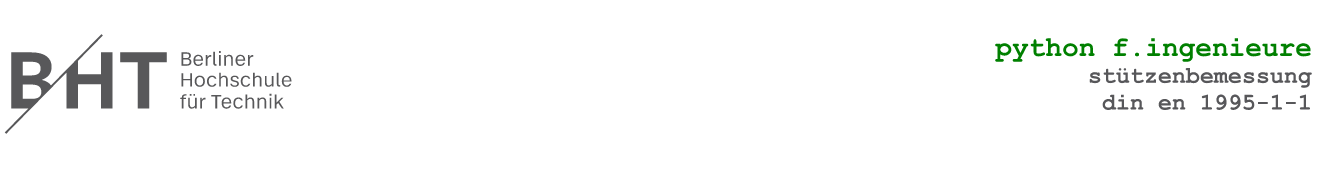

# Anwendungsbeispiel 1: Stützenbemessung 

## Einführung

In den nachfolgenden Kapiteln wird aus der Verknüpfung mit Excel und Python ein leistungsstarkes Stützenbemessungsprogramm erstellt, welches einen typischen Arbeitsablauf vom Lastabtrag, der Dimensionierung der Stützen und der nachfolgenden Dokumentation abbildet. Durch die Einbindung des Nutzers durch Eingabeparameter und die Ausgabe von Zwischenergebnissen wird die Interaktion und die Kontrolle des gesamten Vorgangs gefördert. Dazu werden zunächst die beiden Berechnungsverfahren nach dem Eurocode 5 (Theorie I. und II. Ordnung) anhand einer programmierten Beispielrechnung erläutert und anschließend sukzessive zu einem komplexen Programm mit diversen Funktionalitäten aus unterschiedlichen Python-Bibliotheken aufgebaut und detailliert aufgeschlüsselt.

- **Lastabtrag**
In dem Reiter *Lastabtrag* steht eine Vorlage zur Verfügung, wo die Ergebnisse eines Lastabtrags geschossweise eingetragen werden. Die Information beinhalten Stützenpositionsnummern, Abmessungen, Einwirkungen, sowie x- und y-Koordinaten der jeweiligen Stütze. <br>


- **Stützenbemessung**
Mittels verschiedener Schalter kann auf der Arbeitsfläche *Stützenbemessung* die Daten eines Geschosses importiert oder Lasten beliebig gerundet werden. <br>

    Zur Bemessung stehen zwei Verfahren nach dem Eurocode 5 zur Verfügung. Die Bemessung erfolgt, indem sämtliche Stützenparameter individuell angepasst und die Zwischen- und Endergebnissen direkt nebeneinander und übersichtlich überblickt werden können. <br>

    Mit der Eingabe von Optimierungsparametern hinsichtlich der Holzgüte und den Querschnittsabmessungen wird eine *Optimierungsfunktion* angeboten, die iterativ und automatisch die Parameter anpasst, bis die gewünschten Werte erzielt sind. 
    

- **Dokumentation** <br>
Nachdem die Stützenbemessung erfolgt und abgeschlossen ist, wird für den Zweck der Dokumentation das Exportieren von schriftlichen Einzelnachweisen als PDF und grafischen Übersichtsdarstellungen in AutoCAD ermöglicht.

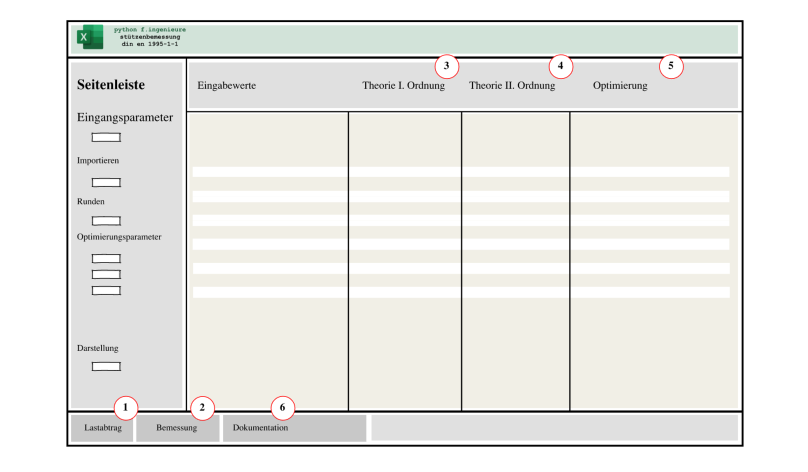 <br>
<center> Abbildung 1: Skizze des Stützenbemessungsprogramms </center> <br>

## Grundlagen zur Stützenbemessung im Holzbau

### Baustatik

Die Ingenieurswissenschaften als Teilgebiet der Naturwissenschaften beschäftigen sich mit der Forschung, Entwicklung und Produktion, mit sämtlichen Aspekten der Technik und beschreiben dabei die natürlichen Gesetzmäßigkeiten mithilfe der Mathematik. Das Bauingenieurswesen zählt neben Maschinenbau und Elektrotechnik dabei zu den drei klassischen Disziplinen der Ingenieurswissenschaften. Im Bauwesen gelten die Gesetzmäßigkeiten der Statik. Als Teilgebiet der Technischen Mechanik geht es um Gesetze des Gleichgewichts eines Körpers, der unter einer einwirkenden Kraft steht (vgl. Mahringer 2013: 8). 

Die Herausforderung besteht darin, ein komplexes Gesamtsystem eines Gebäudes oder Tragwerks anhand Idealisierungen in vereinfachte Einzelsysteme zu unterteilen. Anhand der statischen und werkstoffspezifischen Zusammenhänge werden dann die einzelnen Bauteile untersucht. Die einwirkenden Kräfte resultieren in Spannungen und Verformungen, die mit verschiedenen statischen Nachweisverfahren geprüft werden. Diese lassen sich unterteilen in Tragfähigkeits- und Gebrauchstauglichkeitsnachweise. Die Betrachtung der Tragfähigkeit untersucht einerseits die Belastbarkeit des Querschnitts anhand zulässiger Spannungen und andererseits die räumliche Standsicherheit in Stabilitätsnachweisen (vgl. Becker/Rautenstrauch 2012: 69). 

### Holzbau

Im Ingenieurholzbau wird aufgrund ihrer unterschiedlichen Zusammensetzung und Eigenschaften im Wesentlichen zwischen Nadel- und Laubhölzern unterschieden. 

Nadelhölzer, wie Fichte, Tanne, Lärche und Kiefer weisen eine homogenere und einfachere Zellstruktur auf, bei dem die Fasern parallel entlang des Stammes verlaufen. In Deutschland gehört die Fichte aufgrund des hohen Vorkommens und der schnell nachwachsenden Eigenschaft zu den am häufigsten verwendeten Holzarten. Die durch die simple Struktur des Holzes resultierende geringe Rohdichte von Nadelhölzern führt zu einer sehr guten Bearbeitbarkeit und einer gleichzeitig hohen Belastbarkeit. Laubhölzer hingegen besitzen einen komplexeren Zellaufbau und weisen höhere mechanische Festigkeiten auf. 

Anders als bei isotropen Baustoffen wie Beton oder Stahl liegt die Besonderheit des Holzbaus bei der Berücksichtigung der unterschiedlichen Eigenschaften des Holzes in Abhängigkeit der Faserrichtung. Diese inhomogenen Holzeigenschaften spiegeln sich in den mechanischen Festigkeitswerten wider. Die nachfolgende Abbildung lässt erkennen, dass die Holzeigenschaften anhand von drei Hauptachsen definiert werden können:

- x-Achse: quer zur Faserrichtung und parallel zum Jahrring
- y-Achse: quer zur Faserrichtung und rechtwinklig zum Jahrring
- z-Achse: parallel zur Faserrichtung (vgl. Becker/Rautenstrauch 2012: 4)

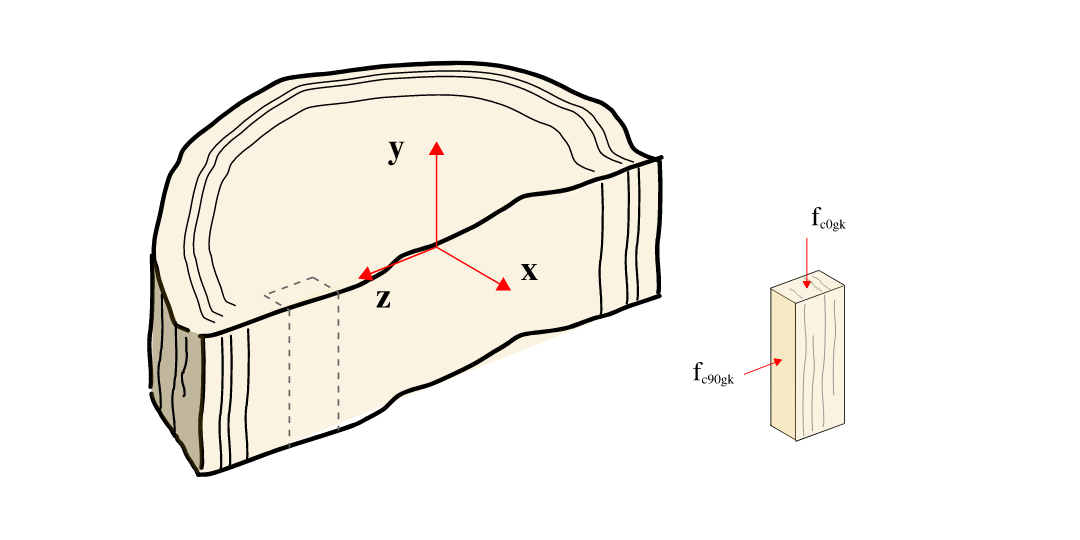
<center> Abbildung 2: Richtungsabhängigkeiten der Holzfestigkeiten </center> <br>

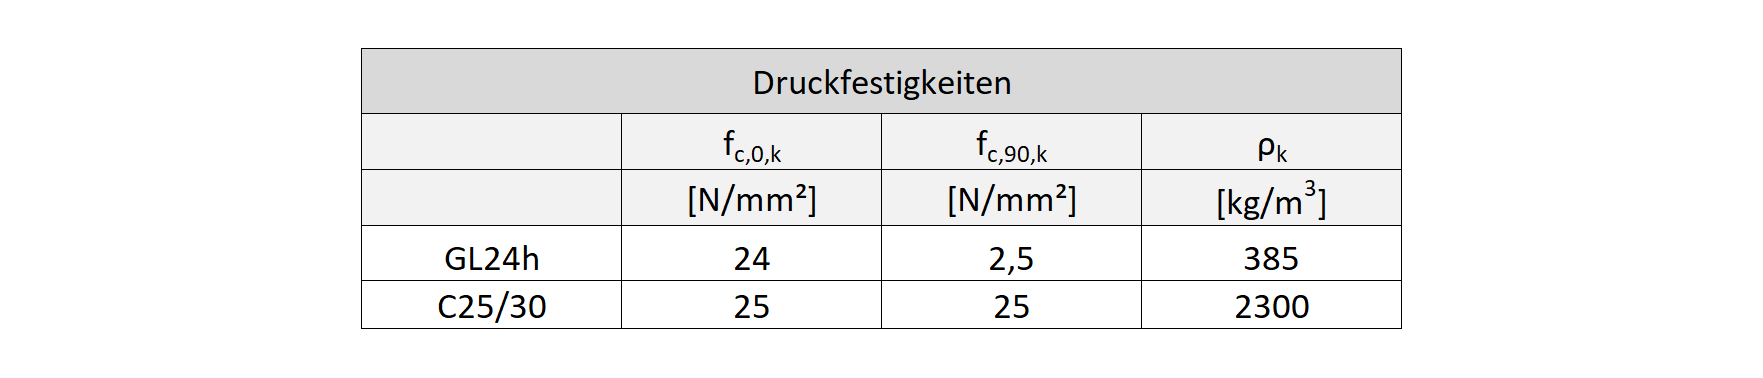
<center> Tabelle 1: Druckfestigkeiten nach der DIN EN 14080 </center> <br>

Diese Unterschiede der Holzeigenschaften sollen kurz anhand der Abbildung und der Druckfestigkeiten nach der DIN EN 14080 veranschaulicht werden. Hier ist ersichtlich, dass die Druckbeanspruchbarkeit des Holzes bei einem Brettschichtholz der Güte GL24h mit 24 $N/mm^2$ in Faserrichtung (y) etwa 10-mal höher ist als die Beanspruchbarkeit quer zur Faserrichtung (z) mit 2.5 $N/mm^2$. Parallel zur Faserrichtung ist demnach die Druckfestigkeit vergleichbar mit der Eigenschaft eines C25/30 Betons und ist dabei etwa 6-mal leichter.

### Stützenbemessung

Die Bemessung eines Tragwerks in der Baustatik verfolgt das Ziel, Verformungen möglichst kleinzuhalten. Ist dies der Fall, können die Verformungen vernachlässigt werden, sodass die Schnittgrößenermittlung am unverformten Gleichgewichtssystem erfolgen kann. Diese Betrachtungsweise der *geometrischen Linearität nach der Theorie I. Ordnung* trifft auf die meisten Bauteile zu. Ebenso wird von einer *physikalischen Linearität* ausgegangen, bei der ein linearer Zusammenhang zwischen einwirkender Last und Verformung besteht. Das Materialverhalten wird hierbei als elastisch bezeichnet, da die Verformungen nach einer Belastung reversibel sind und das Bauteil sich in den Ursprung zurück verformt (vgl. Neuhaus 2017: 820). Die Steifigkeit gegenüber dieser Verformung wird mit dem Elastizitätsmodul beschrieben:

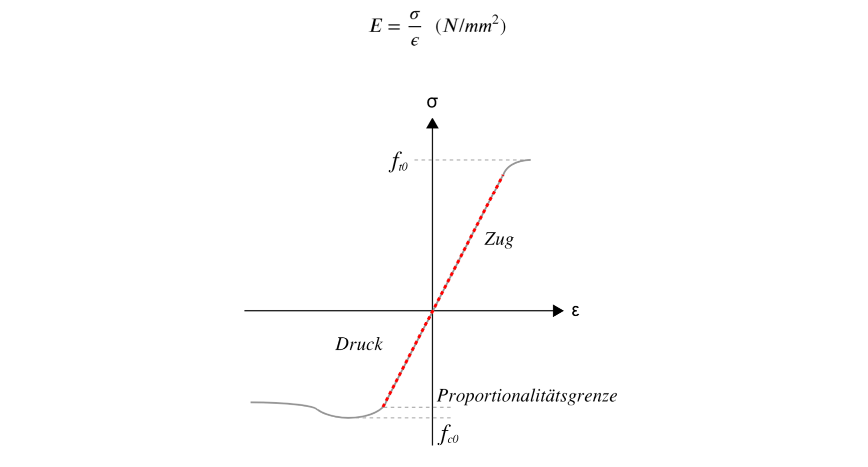
<center> Abbildung 3: Spannungs-Dehnungs Diagramm </center> <br>

Die Gültigkeit der physikalischen Linearität wird in der Spannungs-Dehnungs-Linie in Abbildung 3 deutlich. Dargestellt ist das Ergebnis eines Kurzzeitversuches, bei dem der Zusammenhang zwischen der Dehnung bei aufgebrachter Beanspruchung parallel zur Faserrichtung ermittelt wird. Die rot gestrichelte Linie markiert den linear-elastischen Bereich des Holzes, bei der eine umkehrbare Abhängigkeit zwischen Spannung und Verformung besteht. Bei höheren Beanspruchungen oberhalb der Proportionalitätsgrenze kommt es zu plastischen, nicht reversiblen Verformungen, die stärker als die Spannungen zunehmen (vgl. Neuhaus 2017: 28).

Sind Verformungen durch beispielsweise baupraktische Imperfektionen für die Standsicherheit eines Bauteils maßgebend, muss die Berechnung am verformten System erfolgen. Hierbei ist die Rede von geometrisch nicht-linearem Tragverhalten oder Schnittgrößenermittlung nach *Theorie II. Ordnung*. Zur Vereinfachung kann das Materialverhalten dennoch anhand der Theorie I. Ordnung beschrieben werden. Plastische und irreversible Verformungen (Theorie II. Ordnung) treten nicht auf. 

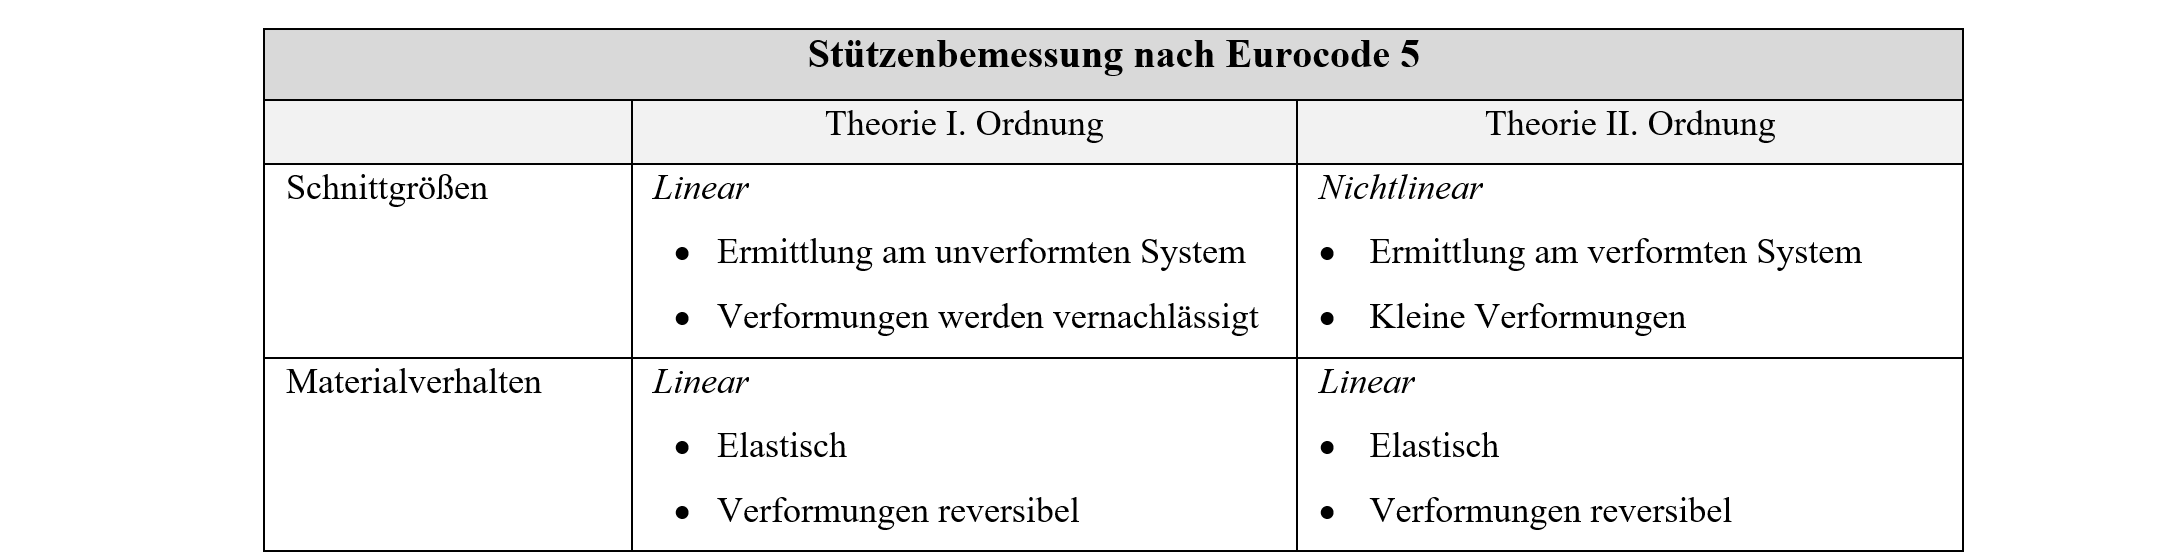 <br>
<center> Tabelle 2: Theorie I. und II. Ordnung bei der Stützenbemessung </center> <br>

Bei Stützen handelt es sich um druckbeanspruchte Stäbe, bei denen aufgrund der schlanken Geometrie ein Stabilitätsversagen noch vor dem Erreichen der Festigkeit maßgebend werden kann. Die dabei auftretenden seitlichen Auslenkungen verursachen weitere Biegemomente, die die Stütze weiter beanspruchen, sodass bei Stützen ein Nachweis der Tragfähigkeit mit Theorie II. Ordnung notwendig ist. In der DIN EN 1995-1-1 im Abschnitt 6.3 werden zwei Nachweisverfahren angeboten, die die Stabilität und die Standsicherheit gegenüber seitlichem Ausweichen regelt. 

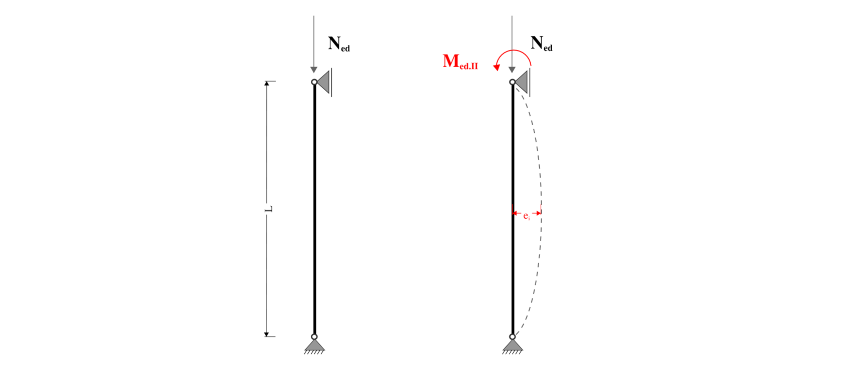
<center> Abbildung 4: Geometrische Linearität und Nichtlinearität </center> <br>

Das **Ersatzstabverfahren nach der Theorie I. Ordnung** ist ein vereinfachter Nachweis, bei dem die Stabilitätsuntersuchung als Näherung vorgenommen wird. Für das Tragsystem wird anhand einer Ersatzstablänge nach Euler (s. Kapitel 3.2) ein Knickbeiwert kc ermittelt, der die geometrische Nichtlinearität berücksichtigt, indem die Druckbeanspruchbarkeit abgemindert wird. Ein zusätzliches Ansetzen einer Imperfektion ist beim Ersatzstabverfahren also nicht notwendig. Dieses Verfahren liefert hinreichend genaue Ergebnisse und hat sich baupraktisch durch den geringen Rechenaufwand bewährt.

Als Alternative ist nach dem Eurocode 5 ein **Spannungsnachweis nach Theorie II. Ordnung** zugelassen. Im Allgemeinen ist dieses Verfahren realitätsnäher und liefert überwiegend wirtschaftlich günstigere Ergebnisse. Besonders bei stabilitätsgefährdeten Stützen durch Imperfektionen oder hohen Momentenbeanspruchungen sollte die Schnittgrößenermittlung am verformten System durchgeführt werden. Die durch die Exzentrizitäten ausgelöste Biegebeanspruchung, führt zu einem überproportionalen Ansteigen des Momentes, welches nur durch eine iterative Berechnung und einem erhöhten Rechenaufwand ermittelt werden kann (vgl. Neuhaus 2017: 819).

**Imperfektionen** sind ungewollte und unvermeidbare Verformungen und werden in geometrische und strukturelle Imperfektionen unterschieden. Im Folgenden werden nur unverschiebliche Stützen betrachtet, die beispielsweise durch horizontale Deckenscheiben gehalten sind. Hier ist eine Vorkrümmung in der Stabachse anzusetzen. Weitere geometrische Imperfektionen, wie ungewollte Schrägstellungen sind für Rahmentragwerke relevant und werden hier nicht weiter betrachtet.


# Literaturverzeichnis

[1] Bonacina, Michael (2018): Python 3, Programmieren für Einsteiger, 2. Aufl., Landshut, Deutschland: BMU Verlag. 

[2] DIN EN 14080:2013 (2013):Holzbauwerke-Brettschichtholz und Balkenschichtholz-Anforderungen; Deutsche Fassung EN 14080:2013, Berlin, Deutschland: Beuth-Verlag.

[3] DIN EN 1995-1-1:2010-12 (2010): Eurocode 5: Bemessung und Konstruktion von Holzbauten - Teil 1-1: Allgemeines-Allgemeines regeln und Regeln für den Hochbau, Berlin, Deutschland: Beuth-Verlag.

[4] DIN EN 1995-1-1/NA:2010-12 (2010): Nationaler Anhang – National festgelegte Parameter – Eurocode 5: Bemessung und Konstruktion von Holzbauten – Teil 1-1: Allgemeines – Allgemeine Regeln und Regeln für den Hochbau, Berlin, Deutschland: Beuth-Verlag.

[5] Mahringer, Walter (2013): Baustatik, Planen - Berechnen - Begutachten von Tragwerken, 1. Aufl., Haan-Gruiten, Deutschland: Europa Lehrmittel. 

[6] Neuhaus, Helmuth (2017): Ingenieurholzbau, Grundlagen – Bemessung – Nachweise - Beispiele, 4. Aufl., Münster, Deutschland: Springer Vieweg. 

---
Berliner Hochschule für Technik (BHT) | Konstruktiver Hoch- und Ingenieurbau (M.Eng.) <br>
Ingenieurholzbau | Prof. Dr. Jens Kickler | Cal Mense 914553 | September 2022